In [1]:
%load_ext autoreload
%autoreload 2

import nibabel as nib
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
import ctvis


In [2]:
p = glob('public_covid_data/rp_im/*')
df = ctvis.get_df_all3()
index = 4
volume = ctvis.load_nifti(df.iloc[index]['FilePathImage'])
mask = ctvis.load_nifti(df.iloc[index]['FilePathMask'])
mask_color = ctvis.label_color(mask)

In [3]:
volume_gray = ctvis.hu_to_gray(volume)

In [8]:
a = np.array([[[100, 100, 100]]])
a.shape

(1, 1, 3)

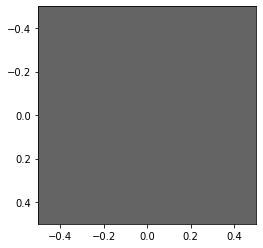

In [9]:
plt.imshow(a)

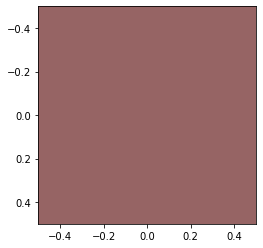

In [10]:
a = np.array([[[150, 100, 100]]])
plt.imshow(a)

In [5]:
original = np.array([[[100, 100, 100]]])
color = np.array([[[255, 0, 0]]])


In [6]:
overlayed = (0.7 * original + 0.3 * color).astype(np.uint8)

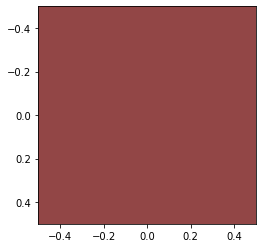

In [7]:
plt.imshow(overlayed)

In [8]:
overlayed

array([[[146,  70,  70]]], dtype=uint8)

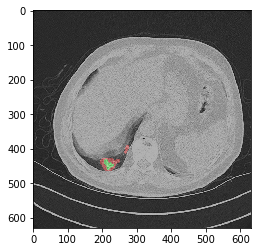

In [10]:
overlayed = (0.7 * volume_gray + 0.3 * mask_color).astype(np.uint8)
plt.imshow(overlayed[:, :, 10])

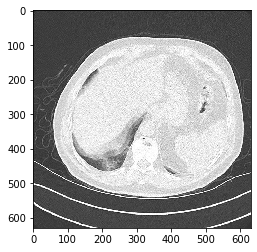

In [11]:
plt.imshow(volume_gray[:, :, 10])

In [4]:
overlayed = np.where(mask_color > 0, (0.7 * volume_gray + 0.3 * mask_color).astype(np.uint8), volume_gray)

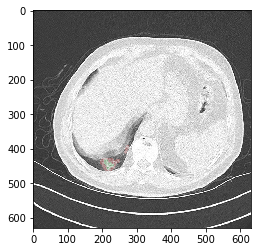

In [5]:
# maskの色が薄くなっている
plt.imshow(overlayed[:, :, 10])

In [6]:
mask.shape

(630, 630, 66)

In [7]:
np.where(mask > 0, True, False)

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [18]:
mask_filter = np.greater(mask, 0)

In [7]:
mask_filter.shape

(630, 630, 66)

In [19]:
mask_filter = np.stack([mask_filter, mask_filter, mask_filter], axis=-1)

In [9]:
mask_filter.shape

(630, 630, 66, 3)

In [ ]:
overlayed = np.where(mask_filter > 0, (0.7 * volume_gray + 0.3 * mask_filter).astype(np.uint8), volume_gray)

In [4]:
overlayed = ctvis.overlay(volume_gray, mask, mask_color, alpha=0.7)

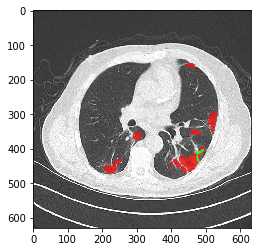

In [7]:
plt.imshow(overlayed[:, :, 30])